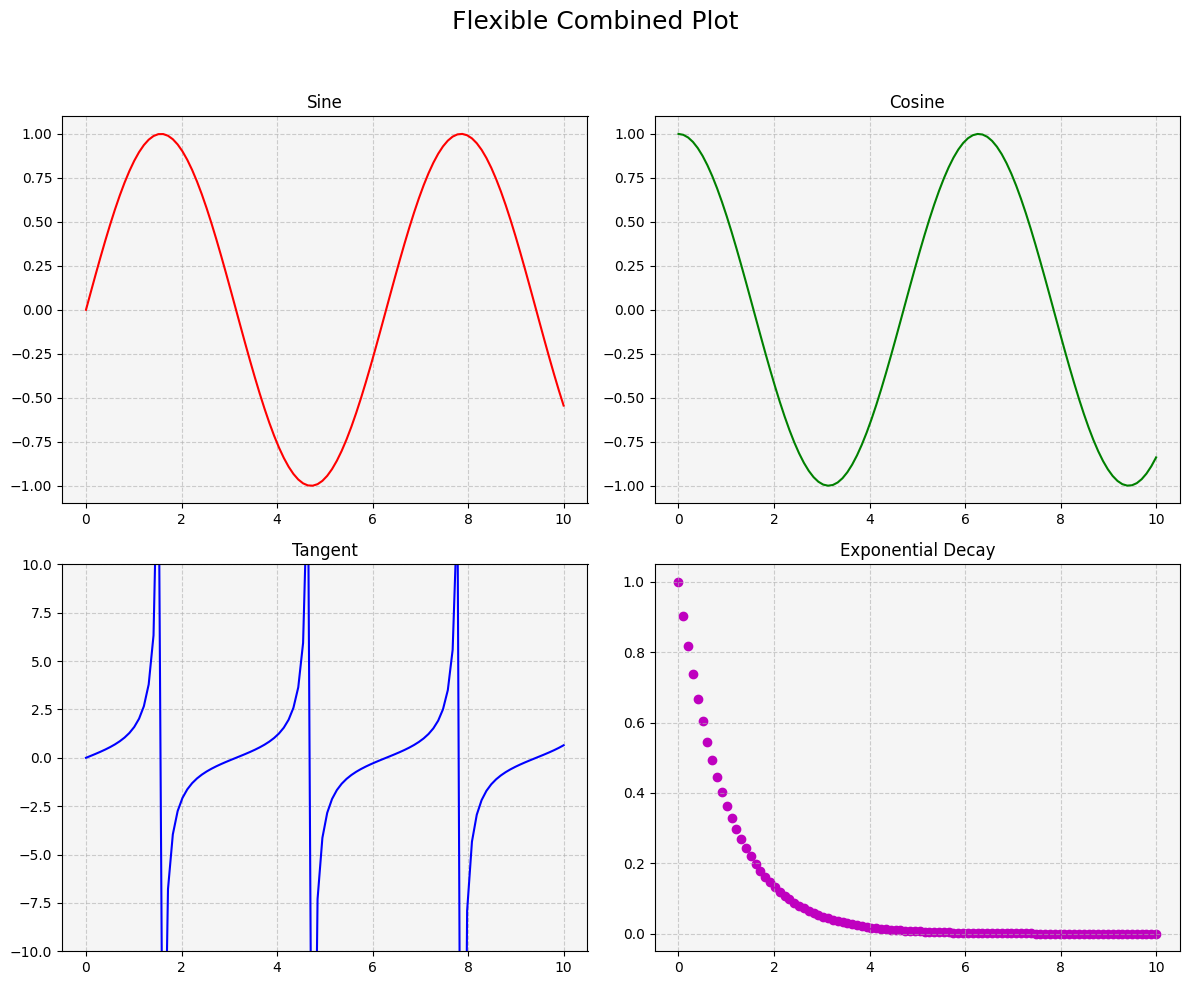

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def is_numeric_array(arr):
    """Check if array contains only numeric data."""
    return np.issubdtype(arr.dtype, np.number)

def apply_style(ax, title, color, plot_type='line'):
    """Apply consistent plot styles based on plot type."""
    ax.set_title(title, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_facecolor('#f5f5f5')
    ax.tick_params(axis='both', labelsize=10)

def plot_functions(x, y_data, titles=None, colors=None, plot_types=None):
   
    # Basic validation
    if not isinstance(x, np.ndarray) or not is_numeric_array(x):
        raise TypeError("x must be a numeric NumPy array.")
    if any(not isinstance(y, np.ndarray) or not is_numeric_array(y) for y in y_data):
        raise TypeError("Each y must be a numeric NumPy array.")
    if any(len(y) != len(x) for y in y_data):
        raise ValueError("All y arrays must match the length of x.")
    
    n = len(y_data)
    rows = (n + 1) // 2
    fig, axs = plt.subplots(rows, 2, figsize=(12, 5 * rows))
    axs = axs.flatten()

    # Default settings if not provided
    titles = titles or [f"Plot {i+1}" for i in range(n)]
    colors = colors or ['b'] * n
    plot_types = plot_types or ['line'] * n

    for i, (ax, y, title, color, ptype) in enumerate(zip(axs, y_data, titles, colors, plot_types)):
        if ptype == 'scatter':
            ax.scatter(x, y, color=color)
        else:
            ax.plot(x, y, color=color)

        if 'tangent' in title.lower():
            ax.set_ylim(-10, 10)  # Controlled scale for tangent
        apply_style(ax, title, color, ptype)

    # Hide unused subplots
    for j in range(n, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle('Flexible Combined Plot', fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
x = np.linspace(0, 10, 100)
y_data = [np.sin(x), np.cos(x), np.tan(x), np.exp(-x)]
titles = ['Sine', 'Cosine', 'Tangent', 'Exponential Decay']
colors = ['r', 'g', 'b', 'm']
plot_types = ['line', 'line', 'line', 'scatter']

plot_functions(x, y_data, titles, colors, plot_types)
